In [1]:
# Importing Required Libraries
import pandas as pd
import numpy as np
from numpy import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the dataset
df= pd.read_csv("Copy of Hotel Bookings.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
# Checking the info of the data columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
# Checking the cancellations and non cancellations in the dataset
df['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [5]:
# Defining our target variable
df['target'] = np.where(df['is_canceled'].isin([1]),1,0)

In [6]:
# Checking the probability of cancellations
# As the dataset has binary outcomes the probability can be defined by mean of the target variable
df['target'].mean()
# we see that there is 37% cancellations

0.37041628277075134

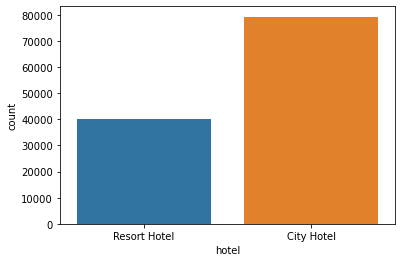

In [7]:
# plotting then cancellation count hotelwise
sns.countplot(x='hotel', data = df)
plt.show()

<AxesSubplot:xlabel='target', ylabel='count'>

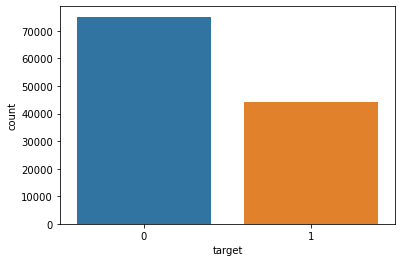

In [8]:
# Plotting the cancellations and non cancellations in entire dataset
sns.countplot(x='target', data = df)

In [9]:
# Checking for null values
df.isnull().sum().sort_values(ascending = False)[:5]

company     112593
agent        16340
country        488
children         4
hotel            0
dtype: int64

In [10]:
# Treatment of null values
nan_replacements={'children':0,'country':'unknown','agent':0, 'company':0}
df.fillna(nan_replacements,inplace=True)

df['meal'].replace('Undefined','SC', inplace=True)
df['deposit_type'].replace('Refundable', 'Deposits', inplace=True)
df['deposit_type'].replace('Non Refund', 'Deposits', inplace=True)
df['deposit_type'].value_counts()

No Deposit    104641
Deposits       14749
Name: deposit_type, dtype: int64

In [11]:
# Confirming the treatment of null values
df.isnull().sum().sort_values(ascending=False)[:5]

hotel                        0
previous_cancellations       0
reservation_status_date      0
reservation_status           0
total_of_special_requests    0
dtype: int64

In [12]:
# defining the categorical variables
cat=df.describe(include = ['object', 'category']).columns
cat

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date'],
      dtype='object')

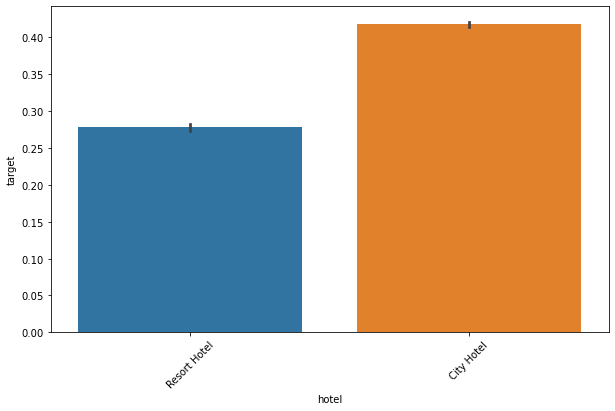

The hotelwise cancellation ratios are as follows:
hotel
City Hotel      0.417270
Resort Hotel    0.277634
Name: target, dtype: float64
__________________________________________________________________________________________


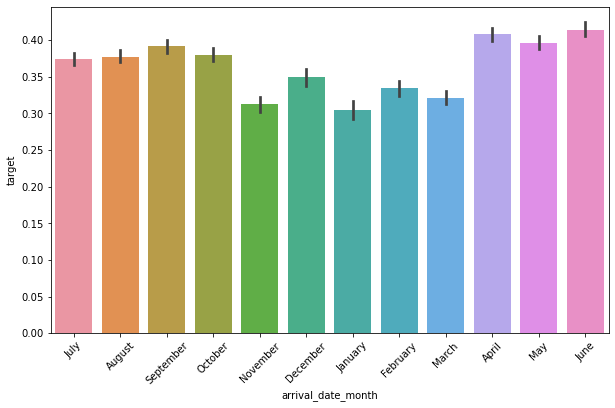

The arrival_date_monthwise cancellation ratios are as follows:
arrival_date_month
April        0.407972
August       0.377531
December     0.349705
February     0.334160
January      0.304773
July         0.374536
June         0.414572
March        0.321523
May          0.396658
November     0.312334
October      0.380466
September    0.391702
Name: target, dtype: float64
__________________________________________________________________________________________


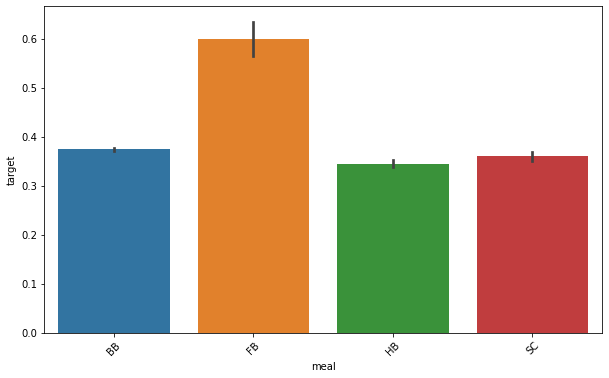

The mealwise cancellation ratios are as follows:
meal
BB    0.373849
FB    0.598997
HB    0.344603
SC    0.359760
Name: target, dtype: float64
__________________________________________________________________________________________


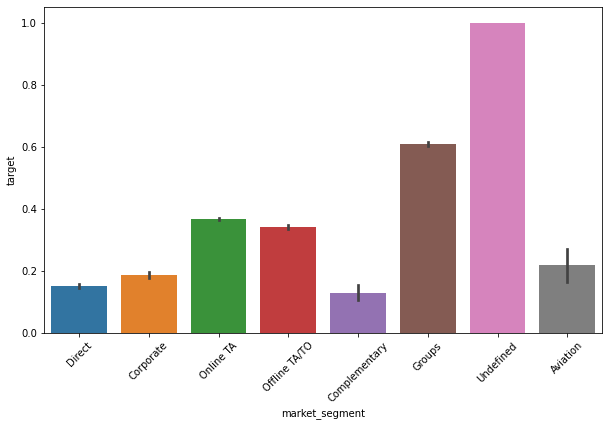

The market_segmentwise cancellation ratios are as follows:
market_segment
Aviation         0.219409
Complementary    0.130552
Corporate        0.187347
Direct           0.153419
Groups           0.610620
Offline TA/TO    0.343160
Online TA        0.367211
Undefined        1.000000
Name: target, dtype: float64
__________________________________________________________________________________________


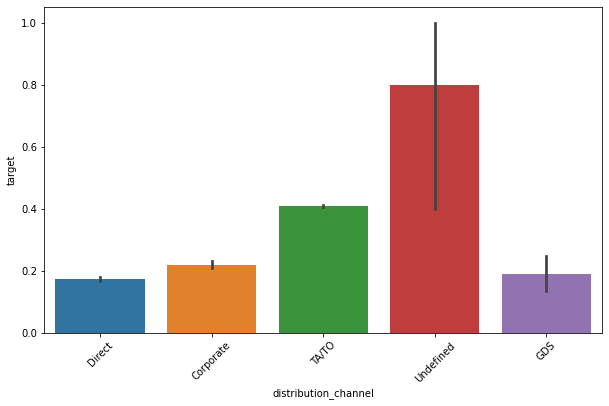

The distribution_channelwise cancellation ratios are as follows:
distribution_channel
Corporate    0.220758
Direct       0.174599
GDS          0.191710
TA/TO        0.410259
Undefined    0.800000
Name: target, dtype: float64
__________________________________________________________________________________________


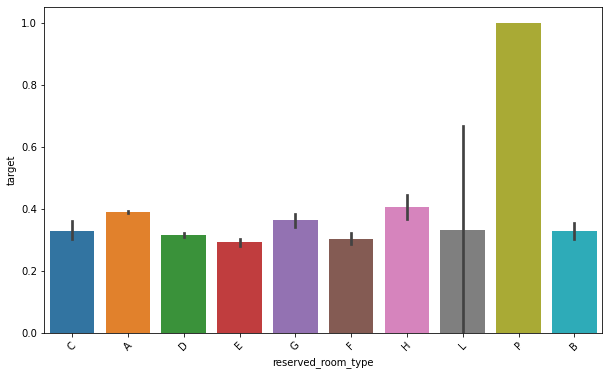

The reserved_room_typewise cancellation ratios are as follows:
reserved_room_type
A    0.391074
B    0.329159
C    0.330472
D    0.317796
E    0.292884
F    0.303763
G    0.364374
H    0.407654
L    0.333333
P    1.000000
Name: target, dtype: float64
__________________________________________________________________________________________


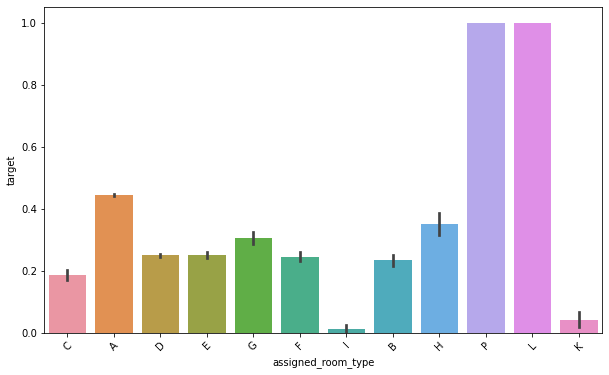

The assigned_room_typewise cancellation ratios are as follows:
assigned_room_type
A    0.444925
B    0.236708
C    0.187789
D    0.251244
E    0.252114
F    0.247134
G    0.305523
H    0.352528
I    0.013774
K    0.043011
L    1.000000
P    1.000000
Name: target, dtype: float64
__________________________________________________________________________________________


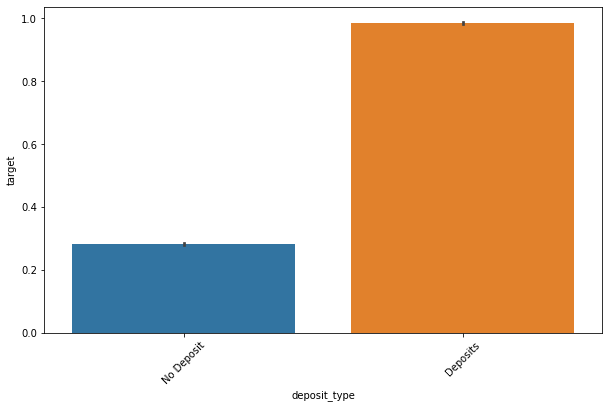

The deposit_typewise cancellation ratios are as follows:
deposit_type
Deposits      0.985152
No Deposit    0.283770
Name: target, dtype: float64
__________________________________________________________________________________________


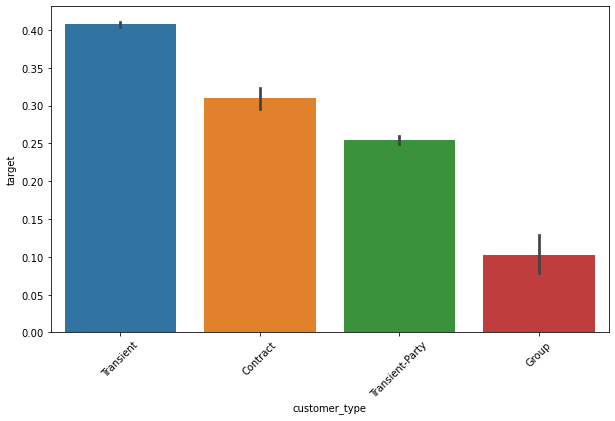

The customer_typewise cancellation ratios are as follows:
customer_type
Contract           0.309617
Group              0.102253
Transient          0.407463
Transient-Party    0.254299
Name: target, dtype: float64
__________________________________________________________________________________________


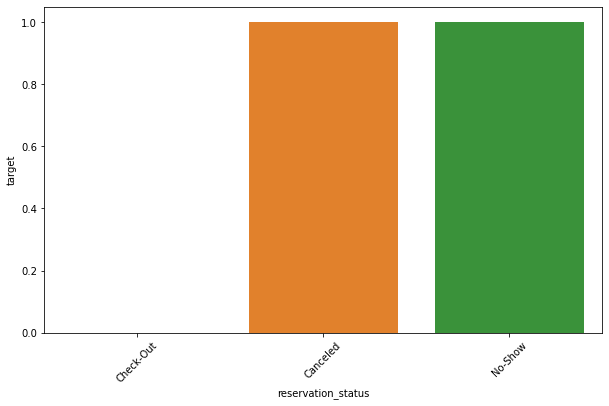

The reservation_statuswise cancellation ratios are as follows:
reservation_status
Canceled     1
Check-Out    0
No-Show      1
Name: target, dtype: int32
__________________________________________________________________________________________


In [13]:
# Plotting the cancellation probability with respect to the columns
from numpy import mean
order=['January','February','March','April','May','June','July','August','September','October','November','December']
for col in cat:
    if df[col].nunique()<20:
        plt.figure(figsize=(10,6))
        sns.barplot(x=col, y ='target', data = df, estimator=mean)
        plt.xticks(rotation=45)
        plt.show()
        print('The '+col+'wise cancellation ratios are as follows:')
        print(df.groupby(col)['target'].mean())
        print('_'*90)
    else:
        pass

<function matplotlib.pyplot.show(close=None, block=None)>

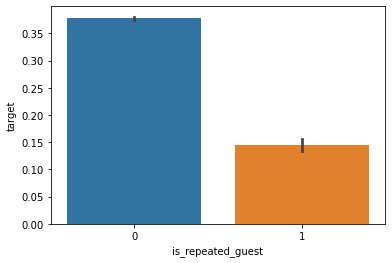

In [14]:
# Checking the probability of cancellations in repeated guests
sns.barplot(x='is_repeated_guest', y = 'target', data=df, estimator=mean)
plt.show

In [15]:
# Replacing the Undefined market segment as Groups market segment 
df['market_segment'].replace('Undefined','Groups', inplace=True)
df.groupby('market_segment')['target'].count()

market_segment
Aviation           237
Complementary      743
Corporate         5295
Direct           12606
Groups           19813
Offline TA/TO    24219
Online TA        56477
Name: target, dtype: int64

<AxesSubplot:xlabel='stays_in_weekend_nights', ylabel='target'>

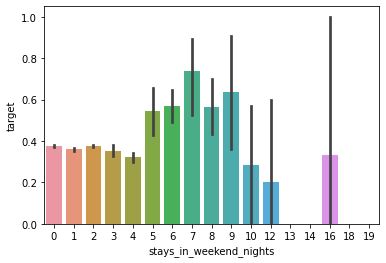

In [16]:
# Plotting the cancellations probability with respect to stays_in_weekend_nights
sns.barplot(x='stays_in_weekend_nights', y = 'target', data=df, estimator=mean)

In [17]:
# Checking the cancellation probabilities with respect to stays_in_weekend_nights
df.groupby('stays_in_weekend_nights')['target'].mean()

stays_in_weekend_nights
0     0.375034
1     0.359401
2     0.374835
3     0.352661
4     0.322372
5     0.544304
6     0.568627
7     0.736842
8     0.566667
9     0.636364
10    0.285714
12    0.200000
13    0.000000
14    0.000000
16    0.333333
18    0.000000
19    0.000000
Name: target, dtype: float64

<AxesSubplot:xlabel='stays_in_week_nights', ylabel='target'>

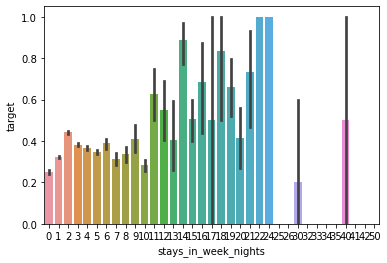

In [18]:
# Plotting the cancellations probability with respect to stays_in_week_nights
sns.barplot(x='stays_in_week_nights', y ='target', data=df, estimator=mean)

stays_in_week_nights_rank
1    0.328366
2    0.412152
3    0.370731
Name: target, dtype: float64


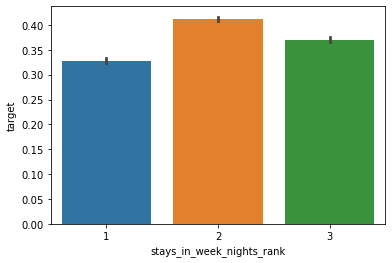

In [19]:
# Dividing the stays_in_week_nights into 3 distict classes using pd.qcut and plotting the cancellation probabilities of classes.
df['stays_in_week_nights_rank'] = pd.qcut(df['stays_in_week_nights'].rank(method='first').values, 3, duplicates='drop').codes+1
sns.barplot(x='stays_in_week_nights_rank', y ='target', data=df, estimator=mean)
print(df.groupby('stays_in_week_nights_rank')['target'].mean())

In [20]:
# Printing the class boundaries of the classes
print('The Minimum Values in the stays_in_week_nights_rank are :')
print(df.groupby('stays_in_week_nights_rank')['stays_in_week_nights'].min())
print('_'*50)
print('The Maximum Values in stays_in_week_nights_rank are :')
print(df.groupby('stays_in_week_nights_rank')['stays_in_week_nights'].max())

The Minimum Values in the stays_in_week_nights_rank are :
stays_in_week_nights_rank
1    0
2    2
3    3
Name: stays_in_week_nights, dtype: int64
__________________________________________________
The Maximum Values in stays_in_week_nights_rank are :
stays_in_week_nights_rank
1     2
2     3
3    50
Name: stays_in_week_nights, dtype: int64


<AxesSubplot:xlabel='previous_cancellations', ylabel='target'>

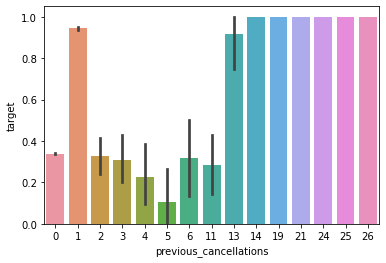

In [21]:
# Checking the cancellation probabilities with respect to previous_cancellations
sns.barplot(x='previous_cancellations', y ='target', data = df, estimator=mean)

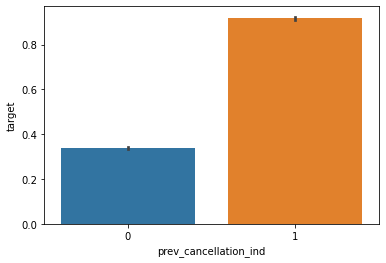

prev_cancellation_ind
0    0.339061
1    0.916410
Name: target, dtype: float64


In [23]:
# Creating a columns with 0 and 1, where 0 represents no prev cancellations
# 1 represents prev cancellations.
# and plotting the cancellation probabilities of each class
df['prev_cancellation_ind']= np.where(df['previous_cancellations'].isin([0]),0,1)
sns.barplot(x=df['prev_cancellation_ind'], y = df['target'], estimator=mean)
plt.show()
print(df.groupby('prev_cancellation_ind')['target'].mean())

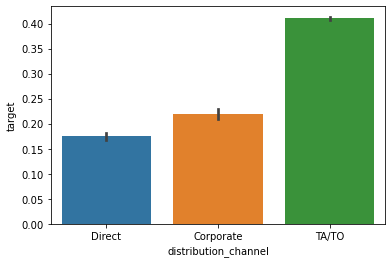

The distribution wise cancellation probabilities are as follows:-
distribution_channel
Corporate    0.219942
Direct       0.174599
TA/TO        0.410278
Name: target, dtype: float64
 
The counts of instances:- 
distribution_channel
Corporate     6870
Direct       14645
TA/TO        97875
Name: target, dtype: int64


In [24]:
# Replacing Undefined as TA/TO, GDS as Corporate
df['distribution_channel'].replace('Undefined','TA/TO', inplace=True)
df['distribution_channel'].replace('GDS','Corporate', inplace=True)

# Plotting Cancellation probabilities for Distribution Channel
sns.barplot(x=df['distribution_channel'], y = df['target'], estimator=mean)
plt.show()
print('The distribution wise cancellation probabilities are as follows:-')
print(df.groupby('distribution_channel')['target'].mean()) #Printing Cancellation probabilites for distribution channel 
print(' ')
print('The counts of instances:- ')
print(df.groupby('distribution_channel')['target'].count()) #Printing the cancellations count for distribution channel

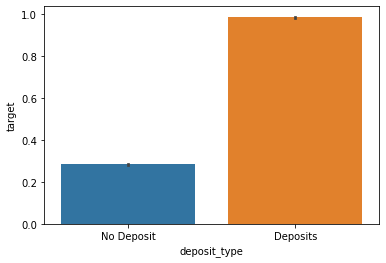

deposit_type
Deposits      0.985152
No Deposit    0.283770
Name: target, dtype: float64
 
deposit_type
Deposits       14749
No Deposit    104641
Name: target, dtype: int64


In [25]:
# Plotting cancellation probabilities for deposit types
sns.barplot(x=df['deposit_type'], y =df['target'], estimator=mean)
plt.show()
# Printing Cancellation probabilities for deposit type
print(df.groupby('deposit_type')['target'].mean())
print(' ')
# Printing Cancellation Count for Deposit Type
print(df.groupby('deposit_type')['target'].count())

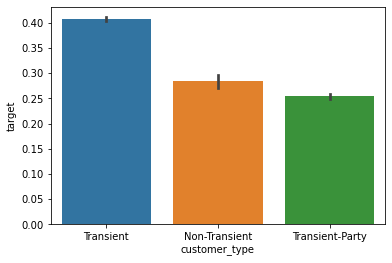

customer_type
Non-Transient      0.283903
Transient          0.407463
Transient-Party    0.254299
Name: target, dtype: float64
 
customer_type
Non-Transient       4653
Transient          89613
Transient-Party    25124
Name: target, dtype: int64


In [26]:
# replacing Contract as Non-Transient, Group as Non-Transient
df['customer_type'].replace('Contract','Non-Transient', inplace=True)
df['customer_type'].replace('Group','Non-Transient', inplace=True)
# Plotting cancellation probabilities for customer_type
sns.barplot(x=df['customer_type'], y =df['target'], estimator=mean)
plt.show()
# Printing Cancellation Probabilities for customer_type
print(df.groupby('customer_type')['target'].mean())
print(' ')
# Printing cancellation count for customer_type
print(df.groupby('customer_type')['target'].count())

<AxesSubplot:xlabel='day_wait_rank', ylabel='target'>

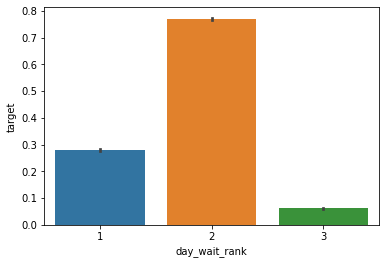

In [27]:
# Creating a new clolumn that classifies days_in_waiting_list into 3 distinct classes using pd.qcut
# and checking the cancellation probabilites of those classes
df['day_wait_rank']= pd.qcut(df['days_in_waiting_list'].rank(method='first').values,3,duplicates='drop').codes+1
sns.barplot(x=df['day_wait_rank'], y = df['target'], estimator=mean)

In [56]:
# Printing the cancellation counts in each classes
df.groupby('day_wait_rank')['target'].sum()

day_wait_rank
1    11105
2    30654
3     2465
Name: target, dtype: int32

<AxesSubplot:xlabel='day_wait_ind', ylabel='target'>

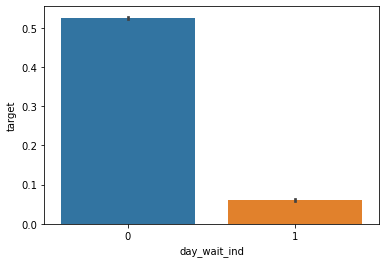

In [29]:
df['day_wait_ind'] = np.where(df['day_wait_rank'].isin([3]),1,0)
sns.barplot(x=df['day_wait_ind'], y = df['target'], estimator=mean)

In [30]:
# Printing the cancellation count
df.groupby('day_wait_ind')['target'].count()

day_wait_ind
0    79593
1    39797
Name: target, dtype: int64

In [31]:
# Replacing 3,4 and 5 as 'More than 2' and 1 and 2 as 'Upto 2' and 0 as 'No requests' in total_of_special_requests to create new classes.
df['total_of_special_requests'].replace({3:'More than 2',4:'More than 2',5:'More than 2',
                                        0:'No requests',1:'Upto 2',2:'Upto 2'}, inplace=True)
# Checking the value counts of each class in total_of_special_requests
df['total_of_special_requests'].value_counts()

No requests    70318
Upto 2         46195
More than 2     2877
Name: total_of_special_requests, dtype: int64

<AxesSubplot:xlabel='total_of_special_requests', ylabel='target'>

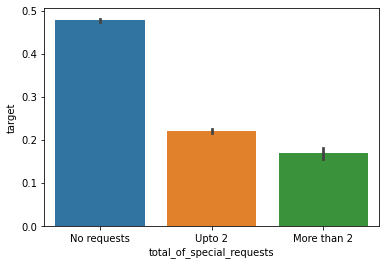

In [32]:
# Plotting the cancellation Probabilites for total_of_special_requests
sns.barplot(x=df['total_of_special_requests'], y = df['target'], estimator=mean)

In [33]:
# Printing the cancellation probabilities for total_of_special_requests
df.groupby('total_of_special_requests')['target'].mean()

total_of_special_requests
More than 2    0.168231
No requests    0.477204
Upto 2         0.220457
Name: target, dtype: float64

<AxesSubplot:xlabel='adr_rank', ylabel='target'>

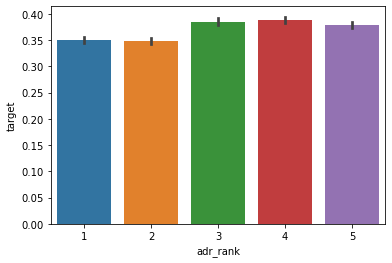

In [34]:
# Cleating a new column where adr is classified into 5 classes and plotting the cancellation probabilities for each class.
df['adr_rank'] = pd.qcut(df['adr'].rank(method='first').values,5, duplicates='drop').codes+1
sns.barplot(x=df['adr_rank'], y =df['target'], estimator=mean)

<AxesSubplot:xlabel='lead_time_rank', ylabel='target'>

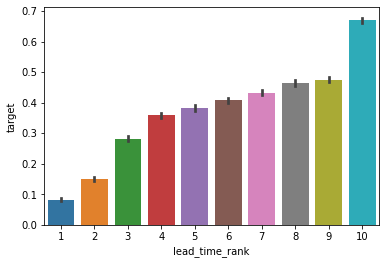

In [35]:
# Creating a new column where lead time is classified into 10 distict classes and plotting the cancellation probabilities of each class
df['lead_time_rank'] = pd.qcut(df['lead_time'].rank(method='first').values,10,duplicates='drop').codes+1
sns.barplot(x=df['lead_time_rank'], y = df['target'], estimator=mean)

In [36]:
df.groupby('lead_time_rank')['target'].sum()

lead_time_rank
1      986
2     1801
3     3361
4     4280
5     4558
6     4862
7     5170
8     5544
9     5668
10    7994
Name: target, dtype: int32

In [37]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'target',
       'stays_in_week_nights_rank', 'prev_cancellation_ind', 'day_wait_rank',
       'day_wait_ind', 'adr_rank', 'lead_time_rank'],
      dtype='object')

In [38]:
# Defining the dependent variable
dep = ['target']
# Defining the numerical column that will be used in ML Classification Model
col_num = ['lead_time', 'adr']
# Defining the categorical columns that will be used in ML Classification Model
col_char=['day_wait_ind','total_of_special_requests','customer_type', 'reserved_room_type','distribution_channel',
          'market_segment','prev_cancellation_ind','stays_in_week_nights_rank','deposit_type']

In [39]:
# Creating the dummy variables for categorical columns
X_char_dum = pd.get_dummies(df[col_char], drop_first=True)

In [40]:
# Concatenating Categorical and Numerical columns to be Used as X
X_all=pd.concat([df[col_num],X_char_dum], axis=1, join='inner')
X_var=X_all
# Using target as Y
Y_var=df['target']

In [41]:
# Importing Machine Learning libraries.
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [42]:
# Splitting the data into train-test
X_train, X_test, y_train, y_test = train_test_split(X_var, Y_var, test_size=.25, random_state=0)
# Initiating the Logistic regression class
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
# Initiating the Decision tree class
dtree = DecisionTreeClassifier(criterion='gini', random_state=0, max_depth=7, min_samples_leaf=10)
dtree.fit(X_train, y_train)
# Initiating the RandomForest Class
rf_1000 = RandomForestClassifier(n_estimators=1000,
                                random_state=2,
                                criterion='gini',
                                max_features='auto',
                                max_depth=7)
rf_1000.fit(X_train,y_train)

RandomForestClassifier(max_depth=7, n_estimators=1000, random_state=2)

In [43]:
# Evaluating the Accuracy for Linear Regression
y_pred = log_reg.predict(X_test)
print('Accuracy of Logistic Regression on Test Set is : {:.2f}'.format(log_reg.score(X_test, y_test)))

Accuracy of Logistic Regression on Test Set is : 0.84


In [44]:
# Evaluating the Accuracy for DecisionTree
y_pred_tree = dtree.predict(X_test)
print('Accuracy of Decision Tree on Test Data is : {:.2f}'.format(dtree.score(X_test,y_test)))

Accuracy of Decision Tree on Test Data is : 0.86


In [45]:
# Evaluating the Accuracy for RandomForest
y_pred_forest = rf_1000.predict(X_test)
print('Accuracy of Random Forest on Test Data is : {:.2f}'.format(rf_1000.score(X_test,y_test)))

Accuracy of Random Forest on Test Data is : 0.86


In [46]:
# Importing confusion_matrix and classification_report
from sklearn.metrics import confusion_matrix, classification_report
# Calculating confusion_matrix for y_test and y_pred
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[16450  2182]
 [ 2715  8501]]


In [47]:
# Calculating the classification report for decision tree
dtree_cls_rpt = classification_report(y_test, y_pred_tree)
print(dtree_cls_rpt)

              precision    recall  f1-score   support

           0       0.87      0.91      0.89     18632
           1       0.84      0.78      0.81     11216

    accuracy                           0.86     29848
   macro avg       0.86      0.84      0.85     29848
weighted avg       0.86      0.86      0.86     29848



In [48]:
# Printing the classification report for RandomForest
rf_cls_rpt = classification_report(y_test, y_pred_forest)
print(rf_cls_rpt)

              precision    recall  f1-score   support

           0       0.86      0.94      0.90     18632
           1       0.88      0.74      0.80     11216

    accuracy                           0.86     29848
   macro avg       0.87      0.84      0.85     29848
weighted avg       0.87      0.86      0.86     29848



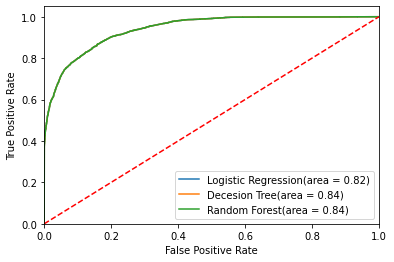

In [49]:
# Importing roc_auc_score androc_curve
from sklearn.metrics import roc_auc_score, roc_curve

logit_roc_auc = roc_auc_score(y_test, log_reg.predict(X_test)) # roc_auc_score for logistic regression
tree_roc_auc = roc_auc_score(y_test, dtree.predict(X_test)) # roc_auc_score for DecisionTree
rf_roc_auc = roc_auc_score(y_test, rf_1000.predict(X_test)) # roc_auc_score for RandomForest

fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1]) #roc_curve for logistic regression
fpr, tpr, thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1]) #roc_curve for DecisionTree
fpr, tpr, thresholds = roc_curve(y_test, rf_1000.predict_proba(X_test)[:,1]) # roc_curve for RandomFOrest
# Plotting the roc_curve for Logistic Regression, DecisionTree and RandomForest
plt.figure()
plt.plot(fpr,tpr, label='Logistic Regression(area = %0.2f)' %logit_roc_auc)
plt.plot(fpr,tpr, label='Decesion Tree(area = %0.2f)'%tree_roc_auc)
plt.plot(fpr, tpr, label='Random Forest(area = %0.2f)'%rf_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim(0.0,1.0)
plt.ylim(0.0, 1.05)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [50]:
# Saving the logistic regression predict probabilites and dividing into 10 distict classes and calculating mean
y_pred_prob = log_reg.predict_proba(X_var)[:,1]
df['y_pred_P']= pd.DataFrame(y_pred_prob)
df['P_rank']= pd.qcut(df['y_pred_P'].rank(method='first').values,10, duplicates='drop').codes+1
df.groupby('P_rank')['target'].mean()

P_rank
1     0.012229
2     0.010051
3     0.011391
4     0.132926
5     0.222883
6     0.287880
7     0.511517
8     0.650054
9     0.869085
10    0.996147
Name: target, dtype: float64

In [51]:
# Saving the decisionTree predict probabilites and dividing into 10 distict classes and calculating mean
y_pred_prob_tree = dtree.predict_proba(X_var)[:,1]
df['y_pred_P_tree'] = pd.DataFrame(y_pred_prob_tree)
df['P_rank_tree']= pd.qcut(df['y_pred_P_tree'].rank(method='first').values,10,duplicates='drop').codes+1
df.groupby('P_rank_tree')['target'].mean()

P_rank_tree
1     0.001340
2     0.000084
3     0.008292
4     0.089371
5     0.186364
6     0.302957
7     0.502220
8     0.639166
9     0.974370
10    1.000000
Name: target, dtype: float64

In [52]:
# Saving the RandomForest predict probabilites and dividing into 10 distict classes and calculating mean
y_pred_prob_rf = rf_1000.predict_proba(X_var)[:,1]
df['y_pred_P_rf'] = pd.DataFrame(y_pred_prob_rf)
df['P_rank_rf']= pd.qcut(df['y_pred_P_rf'].rank(method='first').values,10,duplicates='drop').codes+1
df.groupby('P_rank_rf')['target'].mean()

P_rank_rf
1     0.002764
2     0.000754
3     0.017589
4     0.075551
5     0.177569
6     0.307228
7     0.460759
8     0.723176
9     0.938772
10    1.000000
Name: target, dtype: float64

In [53]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,day_wait_rank,day_wait_ind,adr_rank,lead_time_rank,y_pred_P,P_rank,y_pred_P_tree,P_rank_tree,y_pred_P_rf,P_rank_rf
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,1,0,1,10,0.286897,5,0.153939,4,0.323381,6
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,1,0,1,10,0.731722,8,0.153939,4,0.321971,6
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,1,0,2,2,0.157621,5,0.202147,5,0.157776,4
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,1,0,2,3,0.191576,5,0.202147,5,0.268457,5
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,1,0,3,3,0.417259,6,0.625411,7,0.399626,7


In [54]:
# df.to_csv('hotel_demand_prediction_scored_file.csv')